# Housing Price Prediction Model

**Nicole Pastrana**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
        - [Variable Set 1: Year Built and/or Remodeled](#Variable-Set-1)
        - [Variable Set 2: Bedrooms and Bathrooms](#Variable-Set-2)
        - [Variable Set 3: Square Footage](#Variable-Set-3)
        - [Variable Set 4: General Home Evaluation](#Variable-Set-4)
        - [Variable Set 5: All Previous Variables Combined](#Variable-Set-5)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

##  Abstract

This project aims to build a model to predict housing prices using linear regression given certain data. To achieve this we have tested multiple variable sets and their correlation to sale prices, and then tested the combination of the variable sets to achieve the most accurate (highest correlation) results.

[Back to top](#Housing-Price-Prediction-Model)

## 1. Introduction

The objective of this project is to build a housing price prediction model using linear regression. To get the most accurate results in the prediction we need to understand the correlation of the given variables and the properties' sale price. So, as a first step, we need to know those 'given variables'.

We have studied the structure of the DataFrame and listed the columns to learn what we can work with. We've cleaned and organized the data to be able to try different methods. We've categorized variables into sets for further analysis. Within those categories we've replaced and added data, and renamed and dropped columns for clarity. Then, we'll produce a scatter plot, the covariance and correlation.

The sets we will work with on this project are:
- Variable Set 1: Year Built and/or Remodeled
- Variable Set 2: Bedrooms and Bathrooms
- Variable Set 3: Square Footage
- Variable Set 4: General Home Evaluation

Finally, to be able to achieve the best result (R^2 = 0.89), we will work with a combination of all previous variables and methods in:
- Variable Set 5: All Previous Variables Combined

## 2. The Data

[Back to top](#Housing-Price-Prediction-Model)

### 2.1 Import the Data

Import all libraries used throughout the project, and the CSV file the includes the houses data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
houses_raw = pd.read_csv('houseSmallData.csv')

[Back to top](#Housing-Price-Prediction-Model)

### 2.2 Data Exploration

Getting to know the raw data by printing multiple attributes.

In [2]:
print('1)  Dateframe Shape: ',houses_raw.shape,'\n\n---\n')
print('2)  \'Sale Price\' Overview:\n',houses_raw.SalePrice.describe(),'\n\n---\n')
print('3)  Full list of variables:\n',sorted(houses_raw),'\n\n---\n')
print('4)  Identifying \'Nulls\' to clean data:\n',houses_raw.isnull().sum().sort_values(ascending=False)[0:20])

1)  Dateframe Shape:  (100, 82) 

---

2)  'Sale Price' Overview:
 count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64 

---

3)  Full list of variables:
 ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', '

[Back to top](#Housing-Price-Prediction-Model)

### 2.3 Data Preparation

<ol>
    <li>Removing <em>NULLS</em> and verifying new shape.</li>
    <li>Organizing columns by Data Type to identify:
<ul>
    <li>what (numeric) variables can be used in the prediction model,</li>
    <li>what's the relationship between some columns,</li>
    <li>and (in combination with the <em>'data_description.txt'</em> file) identify if some<br>string values can be converted to integers to further support the model</li>
</ul></li>
</ol>


In [3]:
# Removing NULLS

houses_raw.dropna(axis=1, inplace=True)
houses_raw.shape

(100, 66)

In [4]:
# Organizing Columns

houses_valuessorted = houses_raw.dtypes.astype(str).sort_index().sort_values()
houses_clean = houses_raw.reindex(columns = houses_valuessorted.index)
houses_clean.head()

,MasVnrArea,1stFlrSF,HalfBath,Id,KitchenAbvGr,YearRemodAdd,LotArea,LowQualFinSF,MSSubClass,MiscVal,...,Exterior1st,LotConfig,LotShape,ExterQual,ExterCond,MSZoning,MasVnrType,Electrical,Condition1,KitchenQual
0,196.0,856,1,1,1,2003,8450,0,60,0,...,VinylSd,Inside,Reg,Gd,TA,RL,BrkFace,SBrkr,Norm,Gd
1,0.0,1262,0,2,1,1976,9600,0,20,0,...,MetalSd,FR2,Reg,TA,TA,RL,None,SBrkr,Feedr,TA
2,162.0,920,1,3,1,2002,11250,0,60,0,...,VinylSd,Inside,IR1,Gd,TA,RL,BrkFace,SBrkr,Norm,Gd
3,0.0,961,0,4,1,1970,9550,0,70,0,...,Wd Sdng,Corner,IR1,TA,TA,RL,None,SBrkr,Norm,Gd
4,350.0,1145,1,5,1,2000,14260,0,60,0,...,VinylSd,FR2,IR1,Gd,TA,RL,BrkFace,SBrkr,Norm,Gd


[Back to top](#Housing-Price-Prediction-Model)

### 2.4 Correlation

In this project, we'll explore correlations between ***Sale Price*** and 5 different sets of variables:
- Variable Set **1 - Year Built and/or Remodeled**
- Variable Set **2 - Bedrooms and Bathrooms**
- Variable Set **3 - Square Footage**
- Variable Set **4 - General Home Evaluation**
- Variable Set **5 - All Previous Variables Combined**

Then, we'll decide what's the best combination of variables to get the highest square of the correlation (R^2).

___

[Back to top](#Housing-Price-Prediction-Model)

> #### Variable Set 1

**Year Built and/or Remodeled**
-

Explores if there's a correlation between a house's age and whether it has been remodeled or not.

To achieve this we:
- Add a 'Remodeled' column with values 1, if 'YearBuilt' and 'YearRemodAdd' are NOT equal, else 0.

In [5]:
# Copy of Dataframe with Specific Columns
house_age = houses_clean[['SalePrice','YearBuilt','YearRemodAdd']].copy()

# Determine whether home has been remodeled or not.
house_age['Remodeled'] = np.where(house_age['YearRemodAdd'] == house_age['YearBuilt'], 0, 1)

# Drop unneeded column
house_age.drop(columns=['YearRemodAdd'],inplace=True)

house_age.head()

,SalePrice,YearBuilt,Remodeled
0,208500,2003,0
1,181500,1976,0
2,223500,2001,1
3,140000,1915,1
4,250000,2000,0


<div class="alert alert-block alert-warning">
<b>Results for Variable Set 1</b></div>

R^2 = 0.4753579080438711


,SalePrice,YearBuilt,Remodeled
SalePrice,1.000000,0.658636,-0.058330
YearBuilt,0.658636,1.000000,-0.375431
Remodeled,-0.058330,-0.375431,1.000000


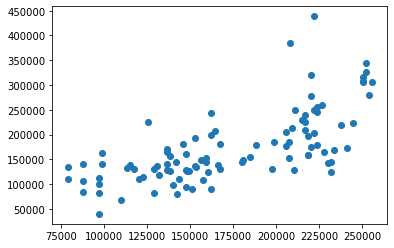

In [6]:
# Define X and Y
X = house_age[house_age.corr().SalePrice.index]
Y = X['SalePrice']
X.drop(['SalePrice'],axis=1,inplace=True)

# ---
# Linear Regression Formula
model = linear_model.LinearRegression().fit(X,Y)

# ---
# Output
print(f"R^2 = {model.score(X,Y)}")  # Covariance
plt.scatter(model.predict(X),Y)  # Scatter Plot
house_age.corr()  # Correlation

___

[Back to top](#Housing-Price-Prediction-Model)

> #### Variable Set 2

**Bedrooms and Bathrooms**
-

Explores if there's a sale price correlation between the number of bedrooms and bathrooms.

To achieve this:
- Values were replaced on the half baths, columns from 1 to 0.5.
- All bathroom columns were added.

In [7]:
# Copy of Dataframe with Specific Columns
house_rooms = houses_clean[['SalePrice','BedroomAbvGr', 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].copy()

# Replace values for half bathrooms to 0.5
house_rooms.replace({'BsmtHalfBath':{1:0.5},'HalfBath':{1:0.5}},inplace=True)

# Add column with total sum of all bathrooms. Then, drop columns included in sum.
house_rooms['Bathrooms'] = house_rooms[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].sum(axis=1)
house_rooms.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],inplace=True)

# Rename columns for clarity
house_rooms.rename(columns={'BedroomAbvGr':'Bedrooms'},inplace=True)

house_rooms.head()

,SalePrice,Bedrooms,Bathrooms
0,208500,3,3.5
1,181500,3,2.5
2,223500,3,3.5
3,140000,3,2.0
4,250000,4,3.5


<div class="alert alert-block alert-warning">
<b>Results for Variable Set 2</b></div>

R^2 = 0.4546432694700935


,SalePrice,Bedrooms,Bathrooms
SalePrice,1.000000,0.233426,0.673733
Bedrooms,0.233426,1.000000,0.308380
Bathrooms,0.673733,0.308380,1.000000


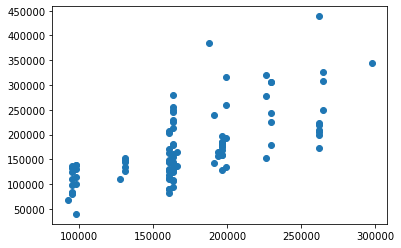

In [8]:
# Define X and Y
X = house_rooms[house_rooms.corr().SalePrice.index]
Y = X['SalePrice']
X.drop(['SalePrice'],axis=1,inplace=True)

# ---
# Linear Regression Formula
model = linear_model.LinearRegression().fit(X,Y)

# ---
# Output
print(f"R^2 = {model.score(X,Y)}")  # Covariance
plt.scatter(model.predict(X),Y)  # Scatter Plot
house_rooms.corr()  # Correlation

___

[Back to top](#Housing-Price-Prediction-Model)

> #### Variable Set 3

**Square Footage**
-

Explores if there's a correlation between a house's square footage and the sale price.

To achieve this:
- All deck and porch square footage was added into a new column 'SqFt_DeckPorch'.

In [9]:
# Copy of Dataframe with Specific Columns
house_sqft = houses_clean[['SalePrice','LotArea','GrLivArea','BsmtFinSF1','GarageArea',
                      'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
                      'MasVnrArea']].copy()

# Add column with total sum of all porch/deck sq.ft. Then, drop columns included in sum.
house_sqft['SqFt_DeckPorch'] = house_sqft[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
house_sqft.drop(columns=['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True)

# Rename columns for clarity
house_sqft.rename(columns={'LotArea':'SqFt_Lot',
                           'GrLivArea':'SqFt_Living',
                           'BsmtFinSF1':'SqFt_FinBsmt',
                           'GarageArea':'SqFt_Garage',
                           'MasVnrArea':'SqFt_MasVnr'},inplace=True)
house_sqft.head()

,SalePrice,SqFt_Lot,SqFt_Living,SqFt_FinBsmt,SqFt_Garage,SqFt_MasVnr,SqFt_DeckPorch
0,208500,8450,1710,706,548,196.0,61
1,181500,9600,1262,978,460,0.0,298
2,223500,11250,1786,486,608,162.0,42
3,140000,9550,1717,216,642,0.0,307
4,250000,14260,2198,655,836,350.0,276


<div class="alert alert-block alert-warning">
<b>Results for Variable Set 3</b></div>

R^2 = 0.7405774384691417


,SalePrice,SqFt_Lot,SqFt_Living,SqFt_FinBsmt,SqFt_Garage,SqFt_MasVnr,SqFt_DeckPorch
SalePrice,1.000000,0.497124,0.735129,0.266713,0.688249,0.571836,0.408352
SqFt_Lot,0.497124,1.000000,0.344181,0.356781,0.382192,0.094462,0.466149
SqFt_Living,0.735129,0.344181,1.000000,0.141221,0.489721,0.549756,0.357848
SqFt_FinBsmt,0.266713,0.356781,0.141221,1.000000,0.161054,0.214430,0.255584
SqFt_Garage,0.688249,0.382192,0.489721,0.161054,1.000000,0.398683,0.317158
SqFt_MasVnr,0.571836,0.094462,0.549756,0.214430,0.398683,1.000000,0.200187
SqFt_DeckPorch,0.408352,0.466149,0.357848,0.255584,0.317158,0.200187,1.000000


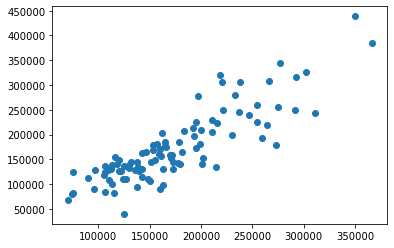

In [10]:
# Define X and Y
X = house_sqft[house_sqft.corr().SalePrice.index]
Y = X['SalePrice']
X.drop(['SalePrice'],axis=1,inplace=True)

# ---
# Linear Regression Formula
model = linear_model.LinearRegression().fit(X,Y)

# ---
# Output
print(f"R^2 = {model.score(X,Y)}")  # Covariance
plt.scatter(model.predict(X),Y)  # Scatter Plot
house_sqft.corr()  # Correlation

___

[Back to top](#Housing-Price-Prediction-Model)

> #### Variable Set 4

**General Home Evaluation**
-

Explores if there's a correlation between a homes quality/condition with its sale price.

To achieve this we:
- Replace string values with integers on some variables.

In [11]:
# Copy of Dataframe with Specific Columns
house_eval = houses_clean[['SalePrice','KitchenQual','ExterQual','ExterCond','OverallQual','OverallCond']].copy()

# Some of the columns don't have numeric data, so we need to replace values.
# Before doing so, we must identify unique values in all columns to determine how to replace data.
for col in house_eval:
    print(house_eval[col].unique())

[208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300 134800 306000 207500  68500  40000
 149350 179900 165500 277500 309000 145000 153000 109000  82000 160000
 170000 130250 141000 319900 239686 249700 113000 127000 177000 114500
 110000 385000 130000 180500 172500 196500 438780 124900 158000 101000
 202500 219500 317000 180000 226000  80000 225000 244000 185000 144900
 107400  91000 135750 136500 193500 153500 245000 126500 168500 260000
 174000 164500  85000 123600 109900  98600 163500 133900 204750 214000
  94750  83000 128950]
['Gd' 'TA' 'Ex' 'Fa']
['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa']
[ 7  6  8  5  9  4 10  3]
[5 8 6 7 4 2 3]


In [12]:
# We've determined the following columns' data can be replaced with numeric values.
rating = ['KitchenQual','ExterQual','ExterCond']
house_eval[rating] = house_eval[rating].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

# Confirm values have been replaced, by identifying all unique values once again.
for col in house_eval:
    print(house_eval[col].unique())

[208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300 134800 306000 207500  68500  40000
 149350 179900 165500 277500 309000 145000 153000 109000  82000 160000
 170000 130250 141000 319900 239686 249700 113000 127000 177000 114500
 110000 385000 130000 180500 172500 196500 438780 124900 158000 101000
 202500 219500 317000 180000 226000  80000 225000 244000 185000 144900
 107400  91000 135750 136500 193500 153500 245000 126500 168500 260000
 174000 164500  85000 123600 109900  98600 163500 133900 204750 214000
  94750  83000 128950]
[4 3 5 2]
[4 3 5 2]
[3 4 2]
[ 7  6  8  5  9  4 10  3]
[5 8 6 7 4 2 3]


<div class="alert alert-block alert-warning">
<b>Results for Variable Set 4</b></div>

R^2 = 0.7791766006753547


,SalePrice,KitchenQual,ExterQual,ExterCond,OverallQual,OverallCond
SalePrice,1.000000,0.683071,0.743234,0.029992,0.855061,-0.170443
KitchenQual,0.683071,1.000000,0.669493,0.065048,0.690203,-0.116505
ExterQual,0.743234,0.669493,1.000000,0.049093,0.706505,-0.128052
ExterCond,0.029992,0.065048,0.049093,1.000000,-0.053032,0.426093
OverallQual,0.855061,0.690203,0.706505,-0.053032,1.000000,-0.154939
OverallCond,-0.170443,-0.116505,-0.128052,0.426093,-0.154939,1.000000


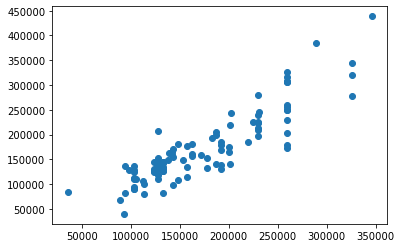

In [13]:
# Define X and Y
X = house_eval[house_eval.corr().SalePrice.index]
Y = X['SalePrice']
X.drop(['SalePrice'],axis=1,inplace=True)

# ---
# Linear Regression Formula
model = linear_model.LinearRegression().fit(X,Y)

# ---
# Output
print(f"R^2 = {model.score(X,Y)}")  # Covariance
plt.scatter(model.predict(X),Y)  # Scatter Plot
house_eval.corr()  # Correlation Table

___

[Back to top](#Housing-Price-Prediction-Model)

> #### Variable Set 5

**All Previous Variables Combined**
-

Explores if there's a correlation improvement when applying all the previous data modifications together.

To achieve this we:
1. Add a 'Remodeled' column with values 1, if 'YearBuilt' and 'YearRemodAdd' are NOT equal, else 0.
2. Values are replaced on the half baths, columns from 1 to 0.5. Then, all bathroom columns are added.
3. All deck and porch square footage is added into a new column 'SqFt_DeckPorch'.
4. Replace string values with integers on some variables.

In [14]:
# Copy of Dataframe with Specific Columns
homes = houses_clean[['SalePrice','YearBuilt','YearRemodAdd','BedroomAbvGr','BsmtFullBath',
                      'BsmtHalfBath','FullBath','HalfBath','LotArea','GrLivArea','BsmtFinSF1','GarageArea',
                      'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MasVnrArea',
                      'KitchenQual','ExterQual','ExterCond','OverallQual','OverallCond']].copy()

# Reproduce the same data modifications as in all the previous trials:
homes['Remodeled'] = np.where(homes['YearRemodAdd'] == homes['YearBuilt'], 0, 1)    # 1 - Year Built and/or remodeled
homes.replace({'BsmtHalfBath':{1:0.5},'HalfBath':{1:0.5}},inplace=True)    # 2 - Bedrooms and Baths
homes['Bathrooms'] = homes[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].sum(axis=1)
homes['SqFt_DeckPorch'] = homes[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)    # 3 - Square Footage
rating = ['KitchenQual','ExterQual','ExterCond']    # 4 - General Home Evaluation
homes[rating] = homes[rating].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

# ---
# Drop Needless Columns
homes.drop(columns=['YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                            'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True)
# Rename columns for clarity
homes.rename(columns={'BedroomAbvGr':'Bedrooms',
                      'LotArea':'SqFt_Lot',
                      'GrLivArea':'SqFt_Living',
                      'BsmtFinSF1':'SqFt_FinBsmt',
                      'GarageArea':'SqFt_Garage',
                      'MasVnrArea':'SqFt_MasVnr'},inplace=True)
# Organize columns for improved presentation
homes = homes.reindex(columns=['SalePrice','Bedrooms','Bathrooms','YearBuilt','Remodeled',
                               'KitchenQual','ExterQual','ExterCond','OverallQual','OverallCond',
                               'SqFt_DeckPorch','SqFt_FinBsmt','SqFt_Garage','SqFt_Living','SqFt_Lot','SqFt_MasVnr',])
homes.head()

,SalePrice,Bedrooms,Bathrooms,YearBuilt,Remodeled,KitchenQual,ExterQual,ExterCond,OverallQual,OverallCond,SqFt_DeckPorch,SqFt_FinBsmt,SqFt_Garage,SqFt_Living,SqFt_Lot,SqFt_MasVnr
0,208500,3,3.5,2003,0,4,4,3,7,5,61,706,548,1710,8450,196.0
1,181500,3,2.5,1976,0,3,3,3,6,8,298,978,460,1262,9600,0.0
2,223500,3,3.5,2001,1,4,4,3,7,5,42,486,608,1786,11250,162.0
3,140000,3,2.0,1915,1,4,3,3,7,5,307,216,642,1717,9550,0.0
4,250000,4,3.5,2000,0,4,4,3,8,5,276,655,836,2198,14260,350.0


<div class="alert alert-block alert-warning">
<b>Results for Variable Set 5</b></div>

R^2 = 0.9003659771675001


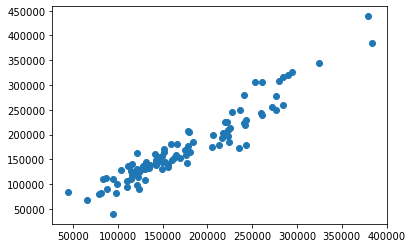

In [15]:
# Define X and Y
X = homes[homes.corr().SalePrice.index]
Y = X['SalePrice']
X.drop(['SalePrice'],axis=1,inplace=True)

# ---
# Linear Regression Formula
model = linear_model.LinearRegression().fit(X,Y)

# ---
# Output
print(f"R^2 = {model.score(X,Y)}")  # Covariance
plt.scatter(model.predict(X),Y)  # Scatter Plot
#homes.corr()  # Correlation Table

<div class="alert alert-block alert-success">
<b>Conclusion:</b> Variable Set 5 is the most correlated to Sale Price, with an R^2 greater than 0.89.<br>This proves that the more numerical data we can gather for each property the more correlated.</div>

___

[Back to top](#Housing-Price-Prediction-Model)

## 3. Project Description

With the objective of building a House Price Prediction Model, we needed to determine what are the variables or combination of variables that would have a strong correlation with Sale Price.

By examining the data (column names, descriptions, data types and null values) I was able to choose and categorize what variables I can work with or test.

In section [2.4 Correlation](#2.4-Correlation) we explore 5 Variable Sets. Each set has different combinations of columns and modifications. Then, we produce results for each one to be able to determine what is the most correlated.

[Back to top](#Housing-Price-Prediction-Model)

### 3.1 Linear Regression

The linear regression models the relationship between variables (dependent and independent). It's goal is to predict or forecast results and/or explain variations between them.

The **dependent** variable (Y) in this model is 'SalePrice'. The other variables selected from the data frame are the **explanatory/independent** ones.

By generating a scatterplot we can visually determine whether there's an association between the dependent and explanatory variables.

To implement Linear Regression in Python we need to import the following:
> import numpy as np<br>
> from sklearn.linear_model import LinearRegression

**Then define X and Y**<br>
<samp>X = homes[homes.corr().SalePrice.index]
Y = X['SalePrice']
X.drop(['SalePrice'],axis=1,inplace=True)</samp>

**Build the Linear Regression Formula**<br>
<samp>model = linear_model.LinearRegression().fit(X,Y)</samp>

**See the Output**<br>
<samp>print(f"R^2 = {model.score(X,Y)}")  # Covariance
plt.scatter(model.predict(X),Y)  # Scatter Plot
#homes.corr()  # Correlation Table</samp>

[Back to top](#Housing-Price-Prediction-Model)

### 3.2 Analysis

The variable sets tested on this project were:

- Variable Set 1: Year Built and/or Remodeled -- 2 vars. -- Low corr
- Variable Set 2: Bedrooms and Bathrooms -- 5 vars. -- Low corr
- Variable Set 3: Square Footage -- 10 vars. -- Good corr
- Variable Set 4: General Home Evaluation -- 5 vars. -- Good corr
- Variable Set 5: All Previous Variables Combined -- 15 vars. -- Excelent corr

The best correlation (in proportion to the number of variables) was Set 4. In Set 4, we replaced values for Condition and Quality columns, from string to their integer equivalent like so:
- Ex	5 - Excellent
- Gd	4 - Good
- TA	3 - Typical/Average
- Fa	2 - Fair
- Po	1 - Poor
        
Transforming the given data into a numeric datatypes will further support the correlation.

Finally, on Set 5, we applied all previous attribute sets, and saw a significant increment in the correlation.

[Back to top](#Housing-Price-Prediction-Model)

### 3.3 Results

Variable Set 5 is by far the most correlated to Sale Price, with an R^2 greater than 0.89.<br>
This proves that the more numerical data we can gather for each property the more correlated.

### 3.4 Verify Your Model Against Test Data

Results for the `jtest.csv` dataset are very similar to the ones produced with `houseSmallData.csv`.<br>
The model can be reproduced without glitches.

To test either replace file name in the [Import the Data](#2.1-Import-the-Data) section, or run the code below.

R^2 = 0.8973776951167909


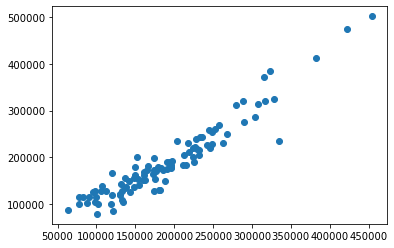

In [22]:
test_run = pd.read_csv('jtest.csv')
# SELECT COLUMNS
test = test_run[['SalePrice','YearBuilt','YearRemodAdd','BedroomAbvGr','BsmtFullBath',
                 'BsmtHalfBath','FullBath','HalfBath','LotArea','GrLivArea','BsmtFinSF1','GarageArea',
                 'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MasVnrArea',
                 'KitchenQual','ExterQual','ExterCond','OverallQual','OverallCond']].copy()
# PREPARE DATA
test['Remodeled'] = np.where(test['YearRemodAdd'] == test['YearBuilt'], 0, 1)    # 1 - Year Built and/or remodeled
test.replace({'BsmtHalfBath':{1:0.5},'HalfBath':{1:0.5}},inplace=True)    # 2 - Bedrooms and Baths
test['Bathrooms'] = test[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']].sum(axis=1)
test['SqFt_DeckPorch'] = test[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)    # 3 - Square Footage
rating = ['KitchenQual','ExterQual','ExterCond']    # 4 - General Home Evaluation
test[rating] = test[rating].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test.drop(columns=['YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                   'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True)
# ORGANIZE AND PRESENT DATA
test.rename(columns={'BedroomAbvGr':'Bedrooms',
                     'LotArea':'SqFt_Lot',
                     'GrLivArea':'SqFt_Living',
                     'BsmtFinSF1':'SqFt_FinBsmt',
                     'GarageArea':'SqFt_Garage',
                     'MasVnrArea':'SqFt_MasVnr'},inplace=True)
test = test.reindex(columns=['SalePrice','Bedrooms','Bathrooms','YearBuilt','Remodeled',
                             'KitchenQual','ExterQual','ExterCond','OverallQual','OverallCond',
                             'SqFt_DeckPorch','SqFt_FinBsmt','SqFt_Garage','SqFt_Living','SqFt_Lot','SqFt_MasVnr',])
# RESULTS
X = test[test.corr().SalePrice.index]
Y = X['SalePrice']
X.drop(['SalePrice'],axis=1,inplace=True)
model = linear_model.LinearRegression().fit(X,Y)
print(f"R^2 = {model.score(X,Y)}")  # Covariance
plt.scatter(model.predict(X),Y)  # Scatter Plot
#test.corr()  # Correlation Table

[Back to top](#Housing-Price-Prediction-Model)

## Conclusion

Our goal was to build a model to predict housing prices using linear regression given certain data. To achieve this we have tested multiple variable sets and their correlation to sale prices, and then tested the combination of the variable sets to achieve the most accurate (highest correlation) results.

We studied the structure of the DataFrame and we cleaned and organized the data to be able to test different variable sets. Finally, we were able to achieve a R-squared result greater than 0.89 when we changed datatypes and combined multiple variables in [Variable Set 5](#Variable-Set-5).

Through this project I learned the importance of understanding the data to begin with. Understand how it can be formatted in a way that we can get more information out of it.

## References

- Department of Statistics and Data Science. “Linear Regression.” Yale University. 1998. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm .